## Topics in Part 5:
### 1) Cleaning Data (Casting Datatypes and Handling Missing Values)
### 2) Working with Dates and Time Series Data
#### ------------------------------------

1- Cleaning Data (Casting Datatypes and Handling Missing Values)

In [141]:
from datetime import datetime
import pandas as pd
import numpy as np

In [142]:
df = pd.read_json('./data.json')
df.head()

,id,name,author,year
0,1,The Space Odyssey,Arthur C. Clarke,2020
1,2,Dune,Frank Herbert,2020
2,3,Neuromancer,William Gibson,2020
3,4,Snow Crash,Neal Stephenson,2020
4,5,The Left Hand of Darkness,Ursula K. Le Guin,2020


In [143]:
df.replace('Dune', np.nan, inplace=True)
df.replace('Snow Crash', np.nan, inplace=True)
df.head(10)

,id,name,author,year
0,1,The Space Odyssey,Arthur C. Clarke,2020
1,2,NaN,Frank Herbert,2020
2,3,Neuromancer,William Gibson,2020
3,4,NaN,Neal Stephenson,2020
4,5,The Left Hand of Darkness,Ursula K. Le Guin,2020
5,6,Foundation,Isaac Asimov,2020
6,7,Hyperion,Dan Simmons,2020
7,8,Brave New World,Aldous Huxley,2020
8,9,Ender's Game,Orson Scott Card,2020
9,10,Altered Carbon,Richard K. Morgan,2020


In [144]:
df.dropna().head()

,id,name,author,year
0,1,The Space Odyssey,Arthur C. Clarke,2020
2,3,Neuromancer,William Gibson,2020
4,5,The Left Hand of Darkness,Ursula K. Le Guin,2020
5,6,Foundation,Isaac Asimov,2020
6,7,Hyperion,Dan Simmons,2020


In [145]:
df.dropna(axis='index', how='all', subset=['name', 'author']).head()

,id,name,author,year
0,1,The Space Odyssey,Arthur C. Clarke,2020
1,2,NaN,Frank Herbert,2020
2,3,Neuromancer,William Gibson,2020
3,4,NaN,Neal Stephenson,2020
4,5,The Left Hand of Darkness,Ursula K. Le Guin,2020


In [146]:
df.isna().head()

,id,name,author,year
0,False,False,False,False
1,False,True,False,False
2,False,False,False,False
3,False,True,False,False
4,False,False,False,False


In [147]:
df.fillna(0).head()

,id,name,author,year
0,1,The Space Odyssey,Arthur C. Clarke,2020
1,2,0,Frank Herbert,2020
2,3,Neuromancer,William Gibson,2020
3,4,0,Neal Stephenson,2020
4,5,The Left Hand of Darkness,Ursula K. Le Guin,2020


In [148]:
df['year'].mean()

2020.0

In [149]:
df['year'] = df['year'].astype(float)
df.dtypes
# df.head()

id          int64
name       object
author     object
year      float64
dtype: object

In [150]:
df['year'].mean()

2020.0

In [151]:
df.head()

,id,name,author,year
0,1,The Space Odyssey,Arthur C. Clarke,2020.0
1,2,NaN,Frank Herbert,2020.0
2,3,Neuromancer,William Gibson,2020.0
3,4,NaN,Neal Stephenson,2020.0
4,5,The Left Hand of Darkness,Ursula K. Le Guin,2020.0


2- Working with Dates and Time Series Data

In [152]:
df_dates = pd.read_json('./dates.json')
df_dates.head()

,id,price,date
0,456,20,2023-12-09
1,548,33,2023-10-09
2,754,22,2023-09-09
3,789,200,2023-12-10
4,101,2,2023-12-11


In [153]:
# NO SE APLICA POR QUE YA ESTA FORMATEADO
# def d_parser(x):
#     return datetime.strptime(x, '%Y-%m-%d %I-%p')

# df_dates['date'] = df_dates['date'].apply(d_parser)
df_dates.dtypes

id                int64
price             int64
date     datetime64[ns]
dtype: object

In [154]:
df_dates.loc[0, 'date'].day_name()

'Saturday'

In [155]:
df_dates['date'].dt.day_name()

0     Saturday
1       Monday
2     Saturday
3       Sunday
4       Monday
5      Tuesday
6    Wednesday
7     Thursday
Name: date, dtype: object

In [156]:
df_dates['DayOfWeek'] = df_dates['date'].dt.day_name()
df_dates['Month'] = df_dates['date'].dt.month_name()
df_dates.head()

,id,price,date,DayOfWeek,Month
0,456,20,2023-12-09,Saturday,December
1,548,33,2023-10-09,Monday,October
2,754,22,2023-09-09,Saturday,September
3,789,200,2023-12-10,Sunday,December
4,101,2,2023-12-11,Monday,December


In [157]:

df_dates['date'].min()

Timestamp('2023-09-09 00:00:00')

In [158]:
df_dates['date'].max()

Timestamp('2023-12-14 00:00:00')

In [159]:
df_dates['date'].max() - df_dates['date'].min()

Timedelta('96 days 00:00:00')

In [160]:
filt = (df_dates['date'] >= pd.to_datetime('2023-01-01')) & (df_dates['date']  < pd.to_datetime('2024-01-01'))

df_dates.loc[filt]

,id,price,date,DayOfWeek,Month
0,456,20,2023-12-09,Saturday,December
1,548,33,2023-10-09,Monday,October
2,754,22,2023-09-09,Saturday,September
3,789,200,2023-12-10,Sunday,December
4,101,2,2023-12-11,Monday,December
5,202,65,2023-12-12,Tuesday,December
6,303,78,2023-12-13,Wednesday,December
7,404,158,2023-12-14,Thursday,December


In [161]:
df_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         8 non-null      int64         
 1   price      8 non-null      int64         
 2   date       8 non-null      datetime64[ns]
 3   DayOfWeek  8 non-null      object        
 4   Month      8 non-null      object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 452.0+ bytes


In [162]:
df_dates['date'] = pd.to_datetime(df_dates['date'])
df_dates = df_dates.sort_values('date')

df_dates.set_index('date', inplace=True)
df_dates.head()

,id,price,DayOfWeek,Month
date,,,,
2023-09-09,754,22,Saturday,September
2023-10-09,548,33,Monday,October
2023-12-09,456,20,Saturday,December
2023-12-10,789,200,Sunday,December
2023-12-11,101,2,Monday,December


In [163]:
df_dates.loc['2023-10']

,id,price,DayOfWeek,Month
date,,,,
2023-10-09,548,33,Monday,October


In [165]:
# df_dates.head()
df_dates['2023-09':'2023-10']

,id,price,DayOfWeek,Month
date,,,,
2023-09-09,754,22,Saturday,September
2023-10-09,548,33,Monday,October


In [168]:
df_dates['2023-09':'2023-11']['price'].mean()  # primer array son filas y el segundo columna

27.5

In [171]:
df_dates['2023-09':'2023-11']['price'].max()

33

In [176]:
highs = df_dates['price'].resample('M').max()
highs['2023-12']

date
2023-12-31    200.0
Freq: M, Name: price, dtype: float64

In [178]:
df_dates.loc['2023-12']

,id,price,DayOfWeek,Month
date,,,,
2023-12-09,456,20,Saturday,December
2023-12-10,789,200,Sunday,December
2023-12-11,101,2,Monday,December
2023-12-12,202,65,Tuesday,December
2023-12-13,303,78,Wednesday,December
2023-12-14,404,158,Thursday,December


<Axes: xlabel='date'>

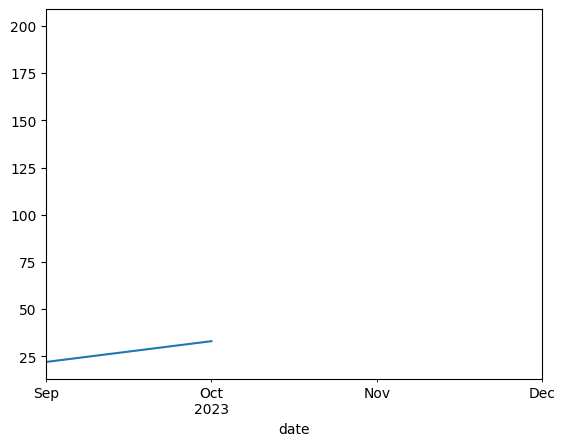

In [194]:
# import matplotlib-inlne as pl
%matplotlib inline
highs.plot()

<Axes: xlabel='date'>

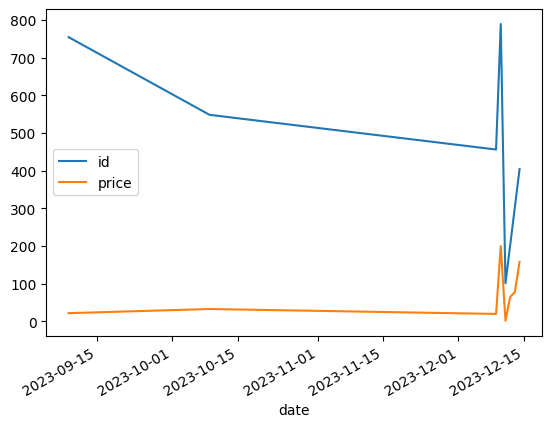

In [196]:
df_dates.plot()

<Axes: xlabel='date'>

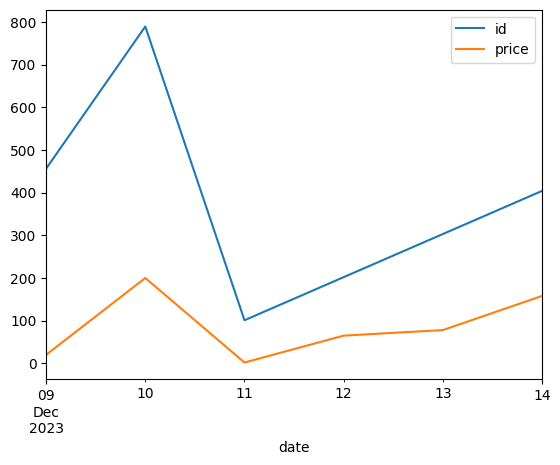

In [198]:
df_dates.loc['2023-12'].plot()

In [208]:
df_dates.resample('M').agg({'price':'max', 'price':'mean'})

,price
date,
2023-09-30,22.000000
2023-10-31,33.000000
2023-11-30,NaN
2023-12-31,87.166667
